<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/tensorflow-model-tokens/notebooks/TF_wordpieces_Train_Document_Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

# Document structure detector model

## MAIN, init, load code

In [2]:
#@title  { form-width: "300px", display-mode: "form" }
import os

!pip install sentencepiece
import sentencepiece as spm




# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys
# ====================================
# ====================================
_git_branch = "tensorflow-model-tokens"  # @param {type:"string"}
# ====================================
# ====================================


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow_hub as hub

#
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


 

# AZ:- THE CODE----------------------------------------------------------------------------------

def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from renderer import HtmlRenderer
  from renderer import to_multicolor_text
  from renderer import known_subjects_dict

  from structures import ContractSubject
  from contract_parser import ContractDocument3

  from ml_tools import ProbableValue

  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller

  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      return super()._to_color_text(tokens, weights, mpl, colormap=colormap, _range=_range)

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

     
     

     
  GLOBALS__['renderer'] = DemoRenderer()

  GLOBALS__['_init_the_code'] = True
  print("❤️ DONE initializing the code")

  # AZ:-------------------------------------------------Init Protocols context===


def read_doc(fn):
  import docx2txt, sys, os

  text = ''
  try:
    text = docx2txt.process(fn)

  except:
    print("Unexpected error:", sys.exc_info())
    os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
    with open(fn + '.txt') as f:
      text = f.read()

  return text

def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX


# 1.
_init_import_code_from_gh()
 
# 3.
_init_the_code(True)



     |████████████████████████████████| 1.0MB 6.7MB/s 
fetching code from GitHub.....tensorflow-model-tokens

🦊 GIT revision:
474
* tensorflow-model-tokens
Created using Colaboratory
Created using Colaboratory
Update tokeniser


installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 128 kB of archives.
After this operation, 633 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 antiword amd64 0.37-11build1 [128 kB]
Fetched 128 kB in 0s (1,881 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-11build1_am

### Rendering utils

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

_c_cyan1=(0, 1, 0.6)
_c_orange1=(1, 0.7, 0)
_c_green1=(0.3, 1, 0)
_c_pink1=(0.3, 0, 1)

_c_cyan2=(0, 0.8, 0.6)
_c_orange2=(1, 0.6, 0)
_c_green2=(0.4, 1, 0)
_c_pink2=(0.4, 0, 1)

token_colors=[
    (0.5, 0.5, 0.5),#undefined
    
    _c_cyan1,
    _c_orange1,
    _c_green1,
    _c_pink1,
    _c_pink1,
    
    _c_cyan2,
    _c_orange2,
    _c_green2,
    _c_pink2,
    _c_pink2,
    
    (0.1, 0.3, 1)#headlines
]

_colormap={}
for k in range(20):
  key = f'c{k}'
  _colormap[key] = token_colors[ k % len(token_colors) ]
    
    
def color_matrix(matrix, tokens):
    
  mt = matrix.T
  vectors = {}

  for k in range( int(matrix.shape[1])):

    key = f'c{k}'
    _colormap[key] = token_colors[ k % len(token_colors) ]
    vectors[key] = mt[k]
  
 
  GLOBALS__['renderer'].render_multicolor_text(tokens, vectors, _colormap, min_color=(0.4, 0.4, 0.4) )
  
  
  
  
  
##------------
def plot_matrix(matrix):
    
  mt = matrix.T
  
  with sns.axes_style("white"):
    plt.figure(figsize=(25, 3))
    ax = sns.heatmap(mt, square=False,  cmap="YlGnBu")
    plt.show()


## Read train set


### 📂👤Load files from GDrive

In [4]:
import pickle

from google.colab import auth
from google.colab import drive
 

drive.mount('/content/gdrive', force_remount=True)

_path = '/content/gdrive/My Drive/GazpromOil/'

with open(_path+'doc_structure_trainset.pickle', 'rb') as handle:
  TRAINSET_read = pickle.load(handle)



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


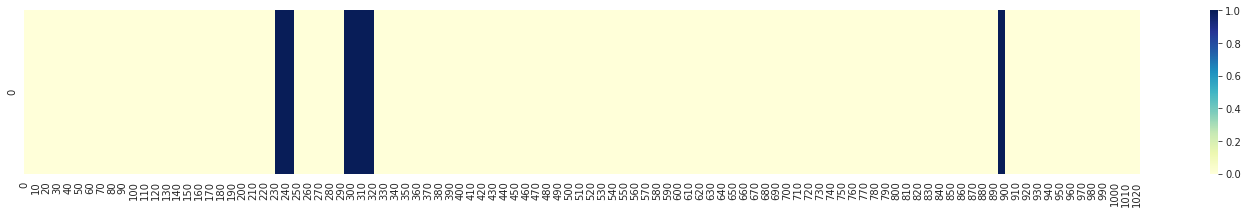

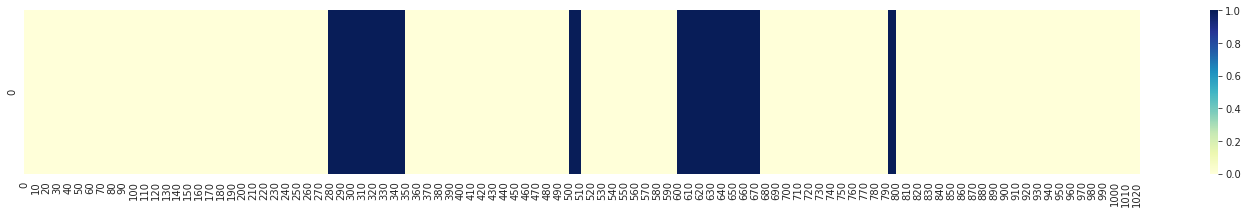

In [5]:
for a, b in TRAINSET_read[0:2]:
  GLOBALS__['renderer'].render_color_text(a, b, _range=(0,1))
  plot_matrix( b.reshape((1024, 1)) )

In [6]:
import numpy as np

TOKENS=[]
LABELS=[]

for a, b in TRAINSET_read:
  TOKENS.append(a)

  mx = np.zeros( (b.shape[0], 2)  )

  mx[:,1] = b
  mx[:,0] = 1-b
#   plot_matrix(mx)
  LABELS.append( mx)
  
LABELS=np.array(LABELS)
                
LABELS.shape

(2048, 1024, 2)

In [7]:
# from documents import TOKENIZER_DEFAULT
from documents import SpmGTokenizer, Tokens


tkz = SpmGTokenizer()
DICT_SIZE=tkz.sp.get_piece_size()
DICT_SIZE

loading tokenization model /content/nlp_tools/vocab/m.model


3000

### Набор для  органолептической (глазо-ручной) оценки 😱результатов обучения
Эти документы модель (мадам) не должна видеть при обучении

In [9]:

!pip install rstr

import glob
from contract_parser import ContractDocument3
from trainset_builder import add_padding_to_max


def read_documents(filename_prefix):
  texts = {}
  for file in glob.glob(filename_prefix+"*.doc"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.doc FILE!!', file)

  for file in glob.glob(filename_prefix+"*.docx"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.docx FILE!!', file)
      
  return texts

contracts_filename_prefix='/content/gdrive/My Drive/GazpromOil/Contracts/'
contracts = read_documents(contracts_filename_prefix)


assert len(contracts) > 0




DOCS=[]
for c in contracts.values():
  doc = ContractDocument3(c)
  doc.parse()
  DOCS.append(doc)
#   print(doc.get_len())
  
def prepare_validation_data(docs):
  tokenss=[]
  for doc in docs:
    tokenss.append(doc.tokens_cc)

  tokenss, lens, _ = add_padding_to_max(tokenss)
  return  tokenss, lens 


VAL_TOKENS, VAL_LENS = prepare_validation_data(DOCS)


Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f5a896ea6c8>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Чудеса.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f5a896ea788>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Доп.согл3 Доверие.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f5a896ea648>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Зеленые.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f5a896ea7c8>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Договор купли-продажи_ООО Парацельс.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named

# MODELS (120 EPOCHS)

## init

In [10]:
import os
import numpy as np

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

from keras.activations import relu
from keras.models import Sequential, Model
from keras.layers import Concatenate, Input, Flatten, Conv1D, MaxPooling1D, Lambda, Add, BatchNormalization
from keras.layers import Dropout, concatenate
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report

from IPython.display import SVG

Using TensorFlow backend.


In [0]:
EPOCHS = 120
BATCH_SIZE = 256

####  support  methods

In [0]:
def plot_training_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  
HISTORIES={}

def plot_compare_models():
  for key in HISTORIES:
    history=HISTORIES[key]
#     plt.plot(history.history['loss'], label=f'{key} loss')
    plt.plot(history.history['val_loss'], label=f'{key} val_loss')
  
  plt.title('Models loss')   
  plt.legend(loc='upper left')
  plt.show()
   

In [0]:
from keras.callbacks import Callback 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import tensorflow as tf

from keras import backend as K
from keras.objectives import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers import LSTM, Flatten

model_checkpoint_path="/content/gdrive/My Drive/Colab Notebooks/checkpoints/"
from documents import TOKENIZER_DEFAULT


def custom_categorical_crossentropy(x, y):
    x = K.flatten(x)
    y = K.flatten(y)
    return categorical_crossentropy(x, y)


def to_hashes(tokens):
  return np.array( [TOKENIZER_DEFAULT.sp.piece_to_id(w) for w in tokens], dtype=np.int32)

 

 

In [0]:
ВоистинуТак=True
НеСейчас=False


def validate_model_4(model, _LABELS_TRAIN,  train=ВоистинуТак, predict_unseen=НеСейчас):
  demo_set = 8
  
  texts = np.array([ to_hashes(t) for t in TOKENS]) 
  val_texts = np.array([ to_hashes(t) for t in VAL_TOKENS], dtype=np.int32) 
   
  
 
  try:
    model = load_model(model_checkpoint_path+model.name)
    print('==== LOADED: ', model_checkpoint_path+model.name)
  except:
    print('cannot load ', model_checkpoint_path+model.name)

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, min_lr=1E-6, verbose=1)
  checkpoint = ModelCheckpoint(model_checkpoint_path+model.name, monitor='val_loss', verbose=1, save_best_only=True, mode='min') 

  if train:
    history = model.fit(texts[demo_set:], _LABELS_TRAIN[demo_set:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE,  callbacks=[reduce_lr, checkpoint])


    HISTORIES[model.name]=history
    plot_training_history(history)
    plot_compare_models()

  if predict_unseen:
    pred = model.predict(val_texts[3:7])  
    _val_texts=VAL_TOKENS
  else:
    pred = model.predict( texts[0:demo_set])
    _val_texts=TOKENS
    
  for p in range(len(pred)):
    print("*"*150)
 
    plot_matrix(pred[p])
    color_matrix(pred[p], _val_texts[p])
    

In [0]:
 raise 'stop here please, it is going to train all models'

## 4: 🥨☹️ Detect structure:  Emb:  3000 x 8;  val_acc: 0.9745
- ### loss: loss: 0.0768 - acc: 0.9754 - val_loss: 0.0804 - val_acc: 0.9745
- на реальных дока результат так себе. Совсем никак 
- после 120 эпох есть потетенциал к обучению, -- не достигла плато




In [0]:
# cp_name="residual-inputs B wordpieces 2 X bi-GRU emb=8x2000 SpatialDropout1D=0.05 l=10"
# base_model = load_model(model_checkpoint_path + cp_name)
# base_model.summary()
from keras.layers import GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Conv1D, Concatenate, SpatialDropout1D
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Embedding
EMB=8

def build_structure_detect_model (features): 
  _dropout = 0.1
  model = Sequential()
  model.add(Embedding(DICT_SIZE, EMB))
  model.add(SpatialDropout1D(_dropout) )

  model.add( Conv1D( filters = features*4, kernel_size=(3), padding='same', activation='relu' ))
#  model.add( Conv1D( filters = features, kernel_size=(3), padding='same', activation='relu' ))
#   model.add( Bidirectional (GRU(features, return_sequences=True)))
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
 
  model.add( TimeDistributed(Dense(features, activation='softmax')))
 
  model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
  model.summary()
  model.name=f'structure_detector2 bi-GRU emb={EMB}x{DICT_SIZE} dropout={_dropout} l={len(model.layers)}'
  return model

 
model = build_structure_detect_model( LABELS.shape[-1] )
model.name

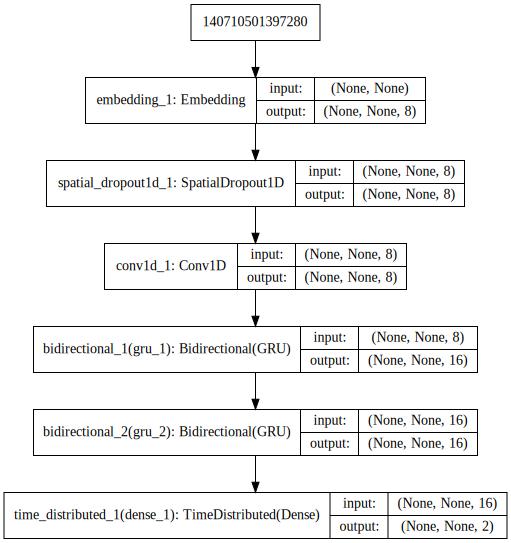

In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:


# validate_model_4(model, LABELS, train=НеСейчас, predict_unseen=ВоистинуТак)


### Train it

In [0]:

EPOCHS=120
BATCH_SIZE=762

validate_model_4(model, LABELS, train=ВоистинуТак, predict_unseen=ВоистинуТак)

## 7: 🥨Detect structure: binary_crossentropy
- ### loss: 0.0689 - acc: 0.9787 - val_loss: 0.0690 - val_acc: 0.9779
- есть потанцевал к дальнейшему обучению 

 



In [0]:
# cp_name="residual-inputs B wordpieces 2 X bi-GRU emb=8x2000 SpatialDropout1D=0.05 l=10"
# base_model = load_model(model_checkpoint_path + cp_name)
# base_model.summary()
from keras.layers import GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Conv1D, Concatenate, SpatialDropout1D
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Embedding
EMB=8

def build_structure_detect_model (features): 
  _dropout = 0.1
  model = Sequential()
  model.add(Embedding(DICT_SIZE, EMB))
  

  model.add( Conv1D( filters = features*4, kernel_size=(5), padding='same', activation='relu' ))
#  model.add( Conv1D( filters = features, kernel_size=(3), padding='same', activation='relu' ))
#   model.add( Bidirectional (GRU(features, return_sequences=True)))
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add(SpatialDropout1D(_dropout) )
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
 
  model.add(SpatialDropout1D(_dropout) )
  model.add( TimeDistributed(Dense(features, activation='softmax')))
 
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
  model.summary()
  model.name=f'structure_detector-7 bi-GRU emb={EMB}x{DICT_SIZE} dropout={_dropout} l={len(model.layers)}'
  return model

 
model7 = build_structure_detect_model( LABELS.shape[-1] )
model7.name

In [0]:
EPOCHS=120
BATCH_SIZE=762

validate_model_4(model7, LABELS, train=ВоистинуТак, predict_unseen=ВоистинуТак)

## 8: 🥨binary_crossentropy, 3 bi-GRU, dropouts, CNN 5x8, EMB=8x3000
- ### loss 240 epochs: loss: 0.0304 - acc: 0.9903 - val_loss: 0.0455 - val_acc: 0.9858

 



In [0]:
# cp_name="residual-inputs B wordpieces 2 X bi-GRU emb=8x2000 SpatialDropout1D=0.05 l=10"
# base_model = load_model(model_checkpoint_path + cp_name)
# base_model.summary()
from keras.layers import GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Conv1D, Concatenate, SpatialDropout1D
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Embedding
EMB=8

def build_structure_detect_model (features): 
  _dropout = 0.1
  model = Sequential()
  model.add(Embedding(DICT_SIZE, EMB))
  

  model.add( Conv1D( filters = features*4, kernel_size=(5), padding='same', activation='relu' ))
#  model.add( Conv1D( filters = features, kernel_size=(3), padding='same', activation='relu' ))
#   model.add( Bidirectional (GRU(features, return_sequences=True)))
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add(SpatialDropout1D(_dropout) )
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
#   model.add(SpatialDropout1D(_dropout) )
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
 
  model.add(SpatialDropout1D(_dropout) )
  model.add( TimeDistributed(Dense(features, activation='softmax')))
 
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
  model.summary()
  model.name=f'structure_detector-8 3 bi-GRU emb={EMB}x{DICT_SIZE} dropout={_dropout} l={len(model.layers)}'
  return model

 
model8 = build_structure_detect_model( LABELS.shape[-1] )
model8.name

In [0]:
EPOCHS=1
BATCH_SIZE=1530

validate_model_4(model8, LABELS, train=ВоистинуТак, predict_unseen=ВоистинуТак)

## 9: 🥨binary_crossentropy, 4 bi-GRU, dropouts, CNN 3x8, EMB=10x3000
- ### Total params: 34,698
- ### loss 120 epochs: loss: 0.2610 - acc: 0.8688 - val_loss: 0.2578 - val_acc: 0.8748

 



In [15]:
# cp_name="residual-inputs B wordpieces 2 X bi-GRU emb=8x2000 SpatialDropout1D=0.05 l=10"
# base_model = load_model(model_checkpoint_path + cp_name)
# base_model.summary()
from keras.layers import GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Conv1D, Concatenate, SpatialDropout1D
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Embedding
EMB=10

def build_structure_detect_model (features): 
  _dropout = 0.1
  model = Sequential()
  model.add(Embedding(DICT_SIZE, EMB))
  

  model.add( Conv1D( filters = features*4, kernel_size=(3), padding='same', activation='relu' ))

  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add(SpatialDropout1D(_dropout) )
  
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add(SpatialDropout1D(_dropout) )
  
  model.add( Bidirectional (GRU(features*4, return_sequences=True)))
  model.add(SpatialDropout1D(_dropout) )

  model.add( Bidirectional (GRU(features*4, return_sequences=True))) 
  
  model.add( TimeDistributed(Dense(features, activation='softmax')))
 
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
  model.summary()
  model.name=f'structure_detector-9 4 bi-GRU emb={EMB}x{DICT_SIZE} dropout={_dropout} l={len(model.layers)}'
  return model

 
model9 = build_structure_detect_model( LABELS.shape[-1] )
model9.name

W0708 09:56:02.184098 140028393805696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 09:56:02.241441 140028393805696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 09:56:02.249885 140028393805696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 09:56:02.678296 140028393805696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 09:56:02.689621 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          30000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 8)           248       
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 16)          816       
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 16)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 16)          1200      
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 16)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 16)          1200      
__________

'structure_detector-9 4 bi-GRU emb=10x3000 dropout=0.1 l=11'

In [0]:
EPOCHS=120
BATCH_SIZE=1530

validate_model_4(model9, LABELS, train=ВоистинуТак, predict_unseen=ВоистинуТак)

==== LOADED:  /content/gdrive/My Drive/Colab Notebooks/checkpoints/structure_detector-9 4 bi-GRU emb=10x3000 dropout=0.1 l=11
Train on 1530 samples, validate on 510 samples
Epoch 1/120
1530/1530 [==============================] - 19s 12ms/step - loss: 0.2603 - acc: 0.8696 - val_loss: 0.2565 - val_acc: 0.8755

Epoch 00001: val_loss improved from inf to 0.25650, saving model to /content/gdrive/My Drive/Colab Notebooks/checkpoints/structure_detector-9 4 bi-GRU emb=10x3000 dropout=0.1 l=11
Epoch 2/120
1530/1530 [==============================] - 14s 9ms/step - loss: 0.2580 - acc: 0.8716 - val_loss: 0.2555 - val_acc: 0.8761

Epoch 00002: val_loss improved from 0.25650 to 0.25550, saving model to /content/gdrive/My Drive/Colab Notebooks/checkpoints/structure_detector-9 4 bi-GRU emb=10x3000 dropout=0.1 l=11
Epoch 3/120
1530/1530 [==============================] - 14s 9ms/step - loss: 0.2579 - acc: 0.8716 - val_loss: 0.2545 - val_acc: 0.8769

Epoch 00003: val_loss improved from 0.25550 to 0.25

## 0: Baseline model (12K weights)
- ### 120 epochs : loss: 0.1623 - acc: 0.9495 - val_loss: 0.1659 - val_acc: 0.9494
- ### 250 epochs : loss: 0.0748 - acc: 0.9750 - val_loss: 0.0839 - val_acc: 0.9719

 



In [0]:

from keras.layers import GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Conv1D, Concatenate, SpatialDropout1D
from keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Embedding
EMB=4

def build_structure_detect_model (features): 
  
   
  model = Sequential()
  model.add(Embedding(DICT_SIZE, EMB))
  

  model.add( Conv1D( filters = 6, kernel_size=(5), padding='same', activation='relu' ))
  model.add( Bidirectional (GRU(6, return_sequences=True)))
  
  model.add( TimeDistributed(Dense(features, activation='softmax')))
 
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
  model.summary()
  model.name=f'structure_detector-0 baseline emb={EMB}x{DICT_SIZE} l={len(model.layers)}'
  return model

 
model0 = build_structure_detect_model( LABELS.shape[-1] )
model0.name

In [0]:
EPOCHS=1200
BATCH_SIZE=762

validate_model_4(model0, LABELS, train=False, predict_unseen=ВоистинуТак)